Imports


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

List Files in Directory

In [6]:
import os
import pandas as pd
def list_files_in_directory(directory):
   return [os.path.join(directory, filename) for filename in os.listdir(directory) if os.path.isfile(os.path.join(directory, filename))]

train_image_paths = list_files_in_directory(r"F:\university\university pdf\semester 5\Machine Learning\practice\internship task2\dogs-vs-cats\train\train")
test_image_paths = list_files_in_directory(r"F:\university\university pdf\semester 5\Machine Learning\practice\internship task2\dogs-vs-cats\test1\test1")

train_df = pd.DataFrame({'image_path': train_image_paths})
test_df = pd.DataFrame({'image_path': test_image_paths})

Data Overview

In [7]:
print(train_df.head())
print(test_df.head())

                                          image_path
0  F:\university\university pdf\semester 5\Machin...
1  F:\university\university pdf\semester 5\Machin...
2  F:\university\university pdf\semester 5\Machin...
3  F:\university\university pdf\semester 5\Machin...
4  F:\university\university pdf\semester 5\Machin...
                                          image_path
0  F:\university\university pdf\semester 5\Machin...
1  F:\university\university pdf\semester 5\Machin...
2  F:\university\university pdf\semester 5\Machin...
3  F:\university\university pdf\semester 5\Machin...
4  F:\university\university pdf\semester 5\Machin...


Data Preparation

In [13]:
TRAIN_DIR_PATH = './train/train'
file_names = os.listdir(TRAIN_DIR_PATH)
print('There are {} number of images in directory.'.format(len(file_names)))

There are 25000 number of images in directory.


In [14]:
TRAIN_DIR_PATH = './test1/test1'
file_names = os.listdir(TRAIN_DIR_PATH)
print('There are {} number of images in directory.'.format(len(file_names)))

There are 12500 number of images in directory.


In [15]:
IMAGE_FOLDER_PATH = "./train/train"
FILE_NAMES = os.listdir(IMAGE_FOLDER_PATH)

Data Inspection

In [16]:
targets = list()
full_paths = list()
train_cats_dir = list()
train_dogs_dir = list()

for file_name in FILE_NAMES:
    target = file_name.split(".")[0]
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name)

    if(target == "dog"):
        train_dogs_dir.append(full_path)
    if(target == "cat"):
        train_cats_dir.append(full_path)

    full_paths.append(full_path)
    targets.append(target)

dataset = pd.DataFrame()
dataset['image_path'] = full_paths
dataset['target'] = targets

In [19]:
train_cats_dir[:5]

['./train/train\\cat.0.jpg',
 './train/train\\cat.1.jpg',
 './train/train\\cat.10.jpg',
 './train/train\\cat.100.jpg',
 './train/train\\cat.1000.jpg']

In [20]:
train_dogs_dir[:5]

['./train/train\\dog.0.jpg',
 './train/train\\dog.1.jpg',
 './train/train\\dog.10.jpg',
 './train/train\\dog.100.jpg',
 './train/train\\dog.1000.jpg']

In [21]:
dataset.head()

image_path target
0     ./train/train\cat.0.jpg    cat
1     ./train/train\cat.1.jpg    cat
2    ./train/train\cat.10.jpg    cat
3   ./train/train\cat.100.jpg    cat
4  ./train/train\cat.1000.jpg    cat

In [22]:
len(dataset)

25000

In [23]:
print("total data counts:", dataset['target'].count())
counts = dataset['target'].value_counts()
print(counts)

total data counts: 25000
target
cat    12500
dog    12500
Name: count, dtype: int64


In [24]:
import matplotlib.pyplot as plt
import cv2

In [25]:
def load_image_rgb(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

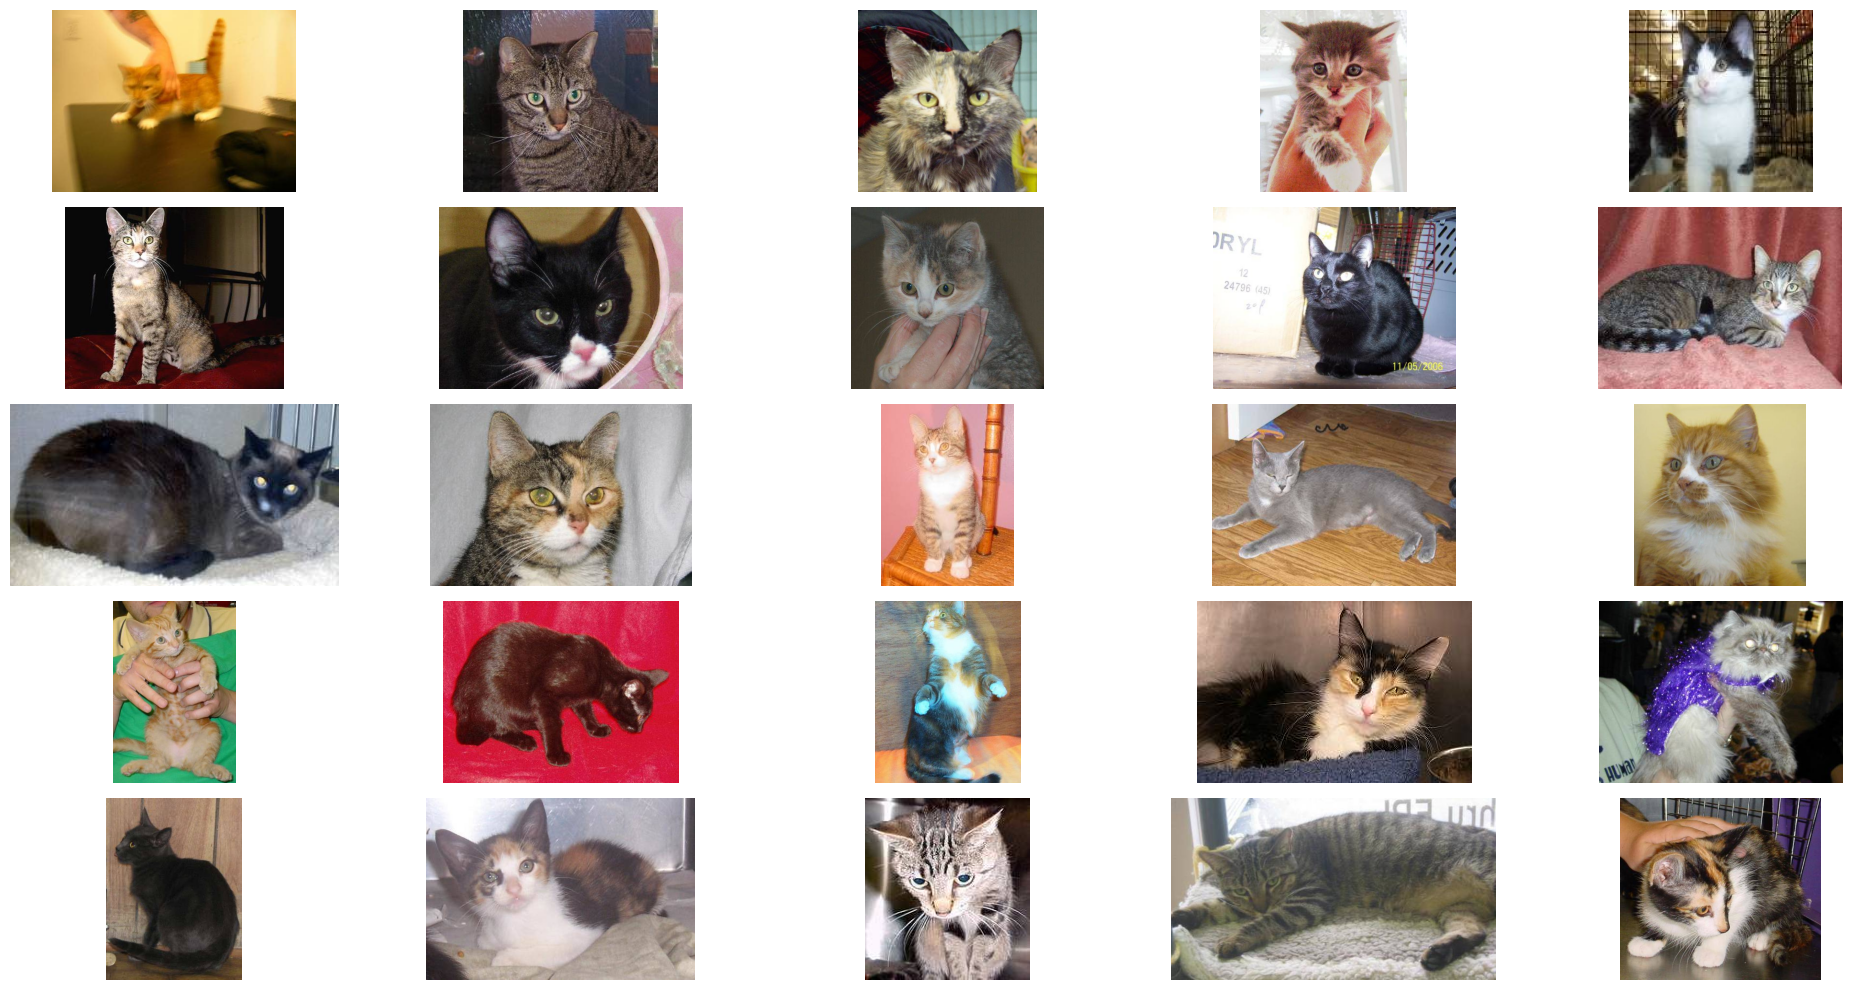

In [26]:
rows = 5
cols = 5
axes = []
fig = plt.figure(figsize=(20, 10))
i = 0

for a in range(rows * cols):
    b = load_image_rgb(train_cats_dir[i])
    axes.append(fig.add_subplot(rows, cols, a + 1))
    plt.imshow(b)
    plt.axis('off')
    i += 1

fig.tight_layout()
plt.show()

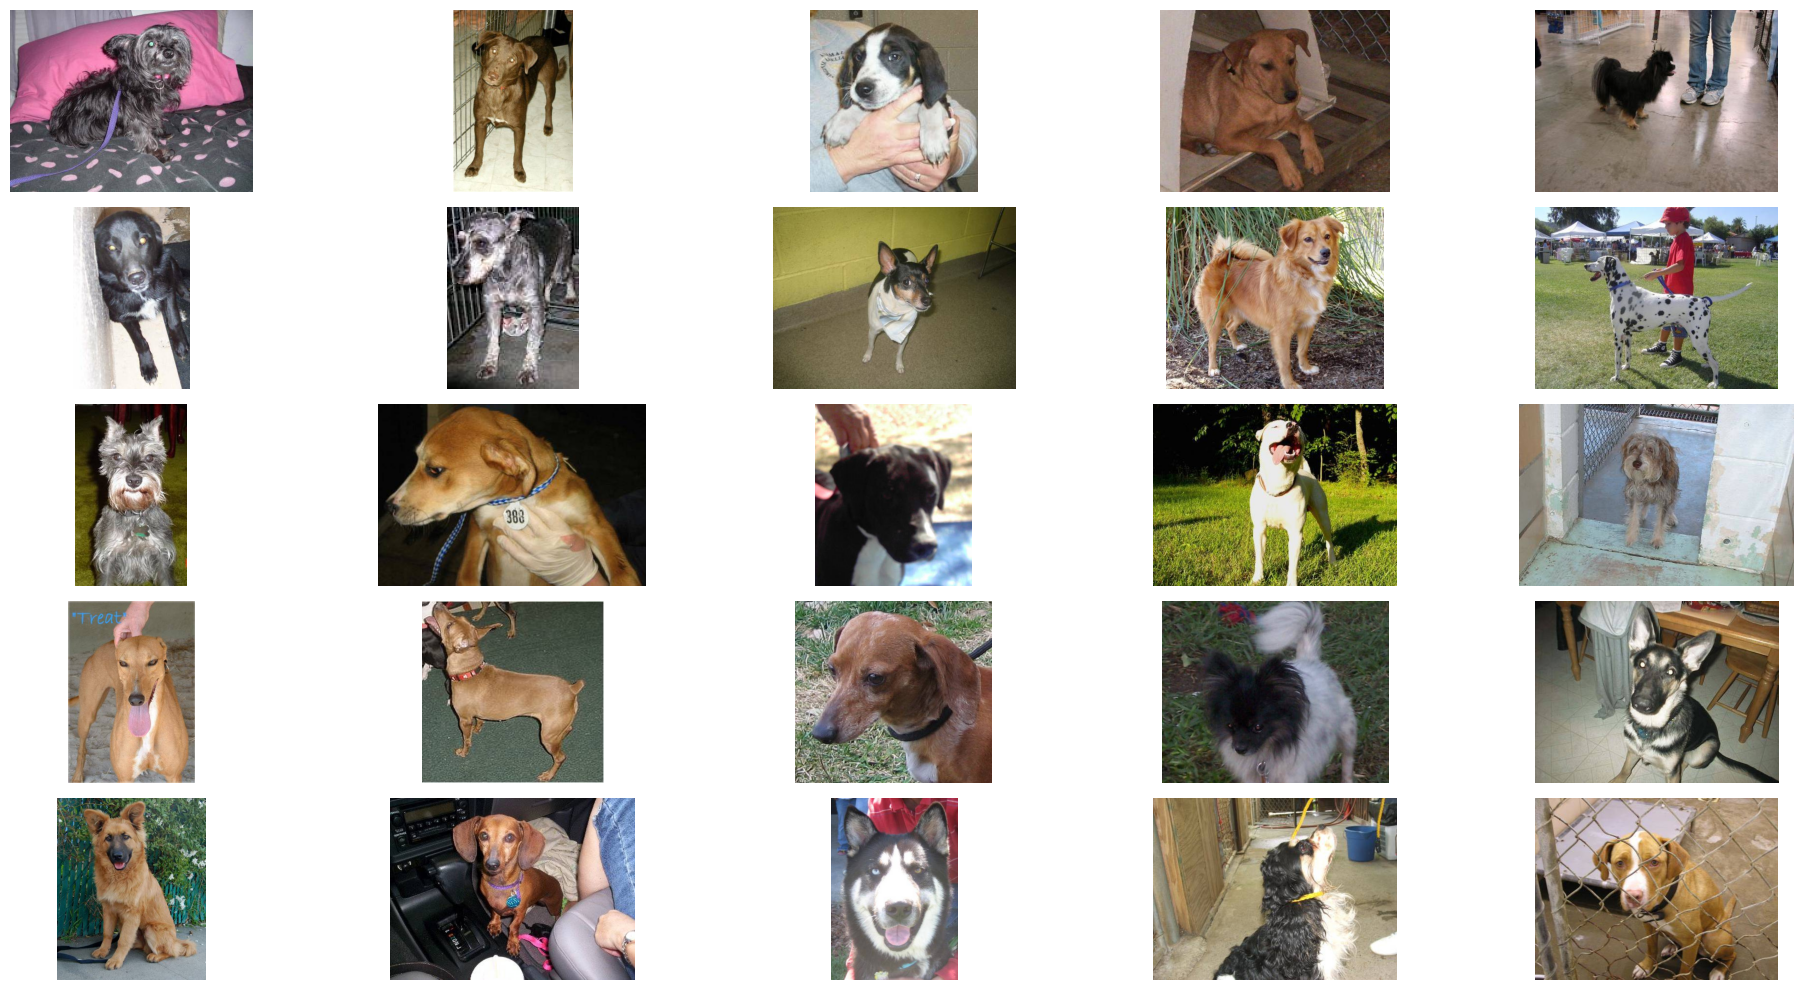

In [27]:
rows = 5
cols = 5
axes = []
fig = plt.figure(figsize=(20, 10))
i = 0

for a in range(rows * cols):
    b = load_image_rgb(train_dogs_dir[i])
    axes.append(fig.add_subplot(rows, cols, a + 1))
    plt.imshow(b)
    plt.axis('off')
    i += 1

fig.tight_layout()
plt.show()

In [28]:
def preprocess_image(image_path, size=(64, 64)):
    image = load_image_rgb(image_path)
    image_resized = cv2.resize(image, size)
    image_flattened = image_resized.flatten()
    return image_flattened


In [29]:
X = []
y = []

for index, row in dataset.iterrows():
    image_path = row['image_path']
    target = row['target']

    image_features = preprocess_image(image_path)
    X.append(image_features)
    y.append(0 if target == 'cat' else 1)

In [30]:
X = np.array(X)
y = np.array(y)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [34]:
pca = PCA(n_components=100)
scaler = StandardScaler()
svm_rbf = SVC(kernel='rbf', random_state=42)

In [35]:
pipeline = make_pipeline(scaler, pca, svm_rbf)

In [36]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=100)), ('svc', SVC(random_state=42))])

In [37]:
y_pred = pipeline.predict(X_test)

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['cat', 'dog']))

Accuracy: 0.6712
Classification Report:
               precision    recall  f1-score   support

         cat       0.67      0.67      0.67      2515
         dog       0.67      0.67      0.67      2485

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000



Confusion matrix

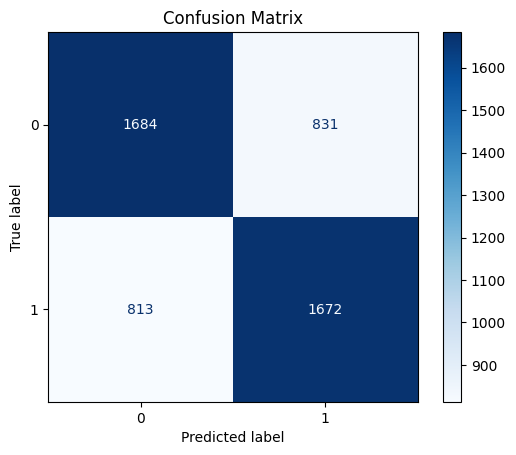

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

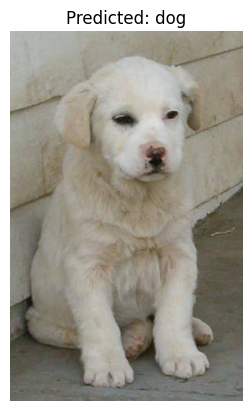

The model predicts that the image is a: dog


In [90]:
def predict_image(image_path):
    image_features = preprocess_image(image_path) 
    image_features = scaler.transform([image_features])  

    prediction = pipeline.predict(image_features)

    predicted_label = 'cat' if prediction == 0 else 'dog'

    img = load_image_rgb(image_path)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    return predicted_label

image_path = r'F:\university\university pdf\semester 5\Machine Learning\practice\internship task2\dogs-vs-cats\test1\test1\12476.jpg' 
predicted_label = predict_image(image_path)
print(f"The model predicts that the image is a: {predicted_label}")


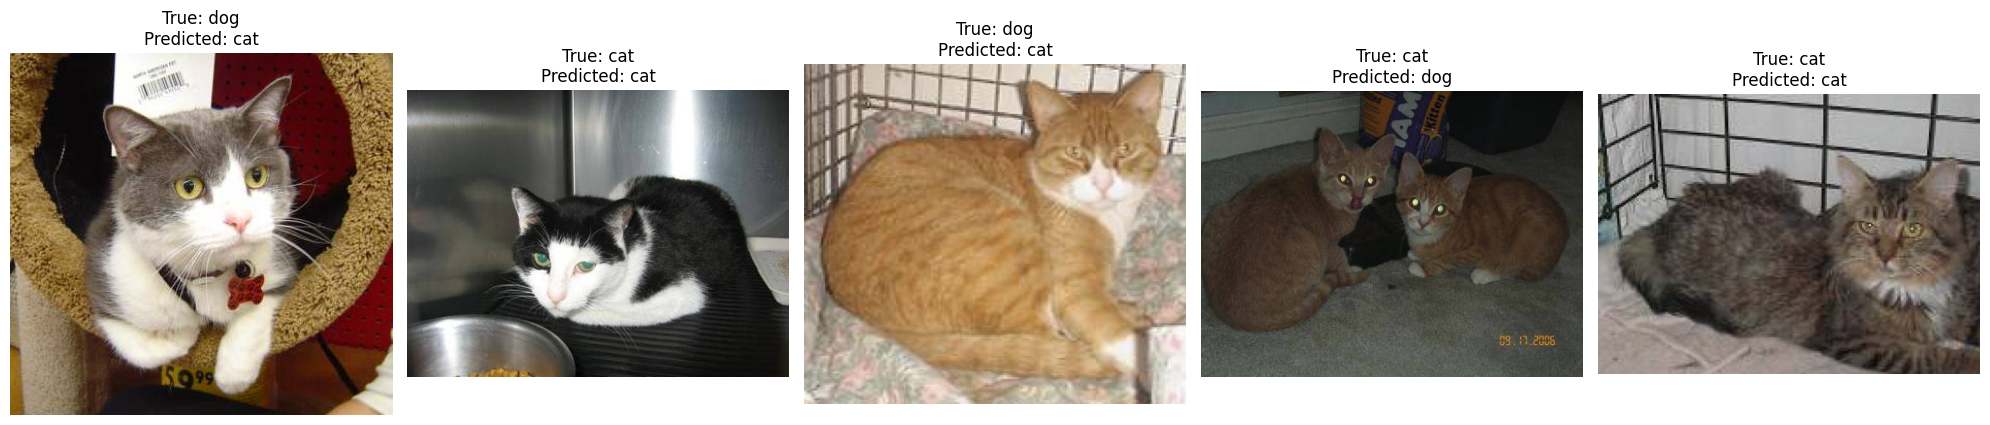

In [89]:
num_images_to_display = 5

plt.figure(figsize=(20, 10))

for i in range(num_images_to_display):
    random_index = np.random.randint(0, len(X_test))

    predicted_label = y_pred[random_index]
    true_label = y_test[random_index]

    image_path = dataset.iloc[random_index]['image_path']

    img = load_image_rgb(image_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    
    plt.title(f"True: {'cat' if true_label == 0 else 'dog'}\nPredicted: {'cat' if predicted_label == 0 else 'dog'}")
    plt.axis('off')

plt.tight_layout()
plt.show()
